# Analysis of the 1996-97 San Antonio Spurs

In [7]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Importing 4 Essentials and styles to make the charts/tables easier to view

In [9]:
team = pd.DataFrame.from_csv('data/spurs1997.csv', encoding='utf-8')

In [10]:
t = team

In [11]:
t

,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
Rk,,,,,,,,,,,,,,,,,,,,,
1,1,1997-10-31,@,DEN,W,107,96,40,74,0.541,...,20,26,0.769,14,34,12,9,3,13,30
2,2,1997-11-01,NaN,CLE,W,83,80,31,62,0.500,...,25,34,0.735,18,42,18,16,2,15,23
3,3,1997-11-03,@,CHI,L,83,87,34,85,0.400,...,15,24,0.625,26,60,21,12,9,13,27
4,4,1997-11-05,NaN,VAN,W,87,79,37,83,0.446,...,10,17,0.588,13,42,22,6,5,16,17
5,5,1997-11-08,NaN,UTA,W,87,80,30,70,0.429,...,39,53,0.736,10,33,13,10,3,17,36
6,6,1997-11-10,@,TOR,W,100,98,41,65,0.631,...,17,24,0.708,19,34,24,15,5,11,17
7,7,1997-11-11,@,MIN,W,93,92,35,82,0.427,...,12,16,0.750,8,27,23,9,6,13,23
8,8,1997-11-13,NaN,LAL,L,100,109,37,75,0.493,...,22,33,0.667,10,39,23,7,7,15,22
9,9,1997-11-15,NaN,MIN,L,94,105,29,75,0.387,...,38,48,0.792,13,54,21,10,3,5,31


## Storing CSV -> into team Variable -> Stored as t for easier manipulation/calling

### Storing Wins and Losses, Assists, Total Rebounds, Offensive Rebounds, Turnovers, Steals, Blocks

In [19]:
wins = t[t["W/L"]=='W']
loss = t[t['W/L']=='L']
assist_w=t[t['AST']>t['AST.1']]
assist_l=t[t['AST']<t['AST.1']]
trebounds_w=t[t['TRB']>t['TRB.1']]
trebounds_l=t[t['TRB']<t['TRB.1']]
orb_w=t[t['ORB']>t['ORB.1']]
orb_l=t[t['ORB']<t['ORB.1']]
to_w=t[t['TOV']>t['TOV.1']]
to_l=t[t['TOV']<t['TOV.1']]
stl_w=t[t['STL']>t['STL.1']]
stl_l=t[t['STL']<t['STL.1']]
blk_w=t[t['BLK']>t['BLK.1']]
blk_l=t[t['BLK']<t['BLK.1']]

### Storing Rebounds won & Storing Assists won

In [20]:
wrebounds_w=trebounds_w[trebounds_w["W/L"] =="W"]
wassist_w=assist_w[assist_w['W/L']=='W']

### Storing Games with Both Assists and Rebounds Edge

In [21]:
astreb = assist_w[assist_w['TRB'] > assist_w['TRB.1']]

### Storing Games Won with Both Assists and Rebounds Edge

In [22]:
astrebw = astreb[astreb['W/L']=='W']

In [23]:
wpct = (len(wrebounds_w)) / (len(trebounds_w))
wwpct = (len(wassist_w)) / (len(assist_w))
wwwpct = len(astrebw)/len(astreb)

print ("The Team won :", str(len(wins)), 'Games')
print ("The Team lost :", str(len(loss)), 'Games')
print ()
print ("The Team got more Assists than the Opponents:", str(len(assist_w)), 'Games')
print ("The Team got less Assists than the Opponents:", str(len(assist_l)), 'Games')
print()
print ("The Team got more Rebounded the Opponents:", str(len(trebounds_w)), 'Games')
print ("The Team got less Rebounded by the Opponents:", str(len(trebounds_l)), 'Games')
print()
print ("The Team got more Offensive Rebounds than the Opponents:", str(len(orb_w)), 'Games')
print ("The Team got less Offensive Rebounds than the Opponents:", str(len(orb_l)), 'Games')
print()
print ("The Team Turned Over the Ball less than the opponents in:", str(len(to_w)), 'Games')
print ("The Team Turned Over the Ball more than the opponents in:", str(len(to_w)), 'Games')
print()
print ("The Team got more Steals than the Opponents:", str(len(stl_w)), 'Games')
print ("The Team got less Steals than the Opponents:", str(len(stl_l)), 'Games')
print()
print ("The Team got more Blocks than the Opponents:", str(len(blk_w)), 'Games')
print ("The Team got less Blocks than the Opponents:", str(len(blk_l)), 'Games')
print()
print("With the edge in Rebounding in, they were able to capitalize in", str(len(wrebounds_w)), 'of' , str(len(trebounds_w)))
print('A Percentage of', str(wpct), 'percent')
print()
print("With the edge in Assist in, they were able to capitalize in", str(len(wassist_w)), 'of' , str(len(assist_w)))
print('A Percentage of', str(wwpct), 'percent')
print()
print("With the edge in Rebounding in and assist, they were able to capitalize in ", str(len(astrebw)), 'of' , str(len(astreb)))
print('A Percentage of', str(wwwpct), 'percent')


The Team won : 56 Games
The Team lost : 26 Games

The Team got more Assists than the Opponents: 54 Games
The Team got less Assists than the Opponents: 20 Games

The Team got more Rebounded the Opponents: 56 Games
The Team got less Rebounded by the Opponents: 24 Games

The Team got more Offensive Rebounds than the Opponents: 34 Games
The Team got less Offensive Rebounds than the Opponents: 40 Games

The Team Turned Over the Ball less than the opponents in: 64 Games
The Team Turned Over the Ball more than the opponents in: 64 Games

The Team got more Steals than the Opponents: 12 Games
The Team got less Steals than the Opponents: 60 Games

The Team got more Blocks than the Opponents: 56 Games
The Team got less Blocks than the Opponents: 19 Games

With the edge in Rebounding in, they were able to capitalize in 45 of 56
A Percentage of 0.8035714285714286 percent

With the edge in Assist in, they were able to capitalize in 45 of 54
A Percentage of 0.8333333333333334 percent

With the edge i

# I also love Jupyiter, makes it so easy to make notes and show key things to you 

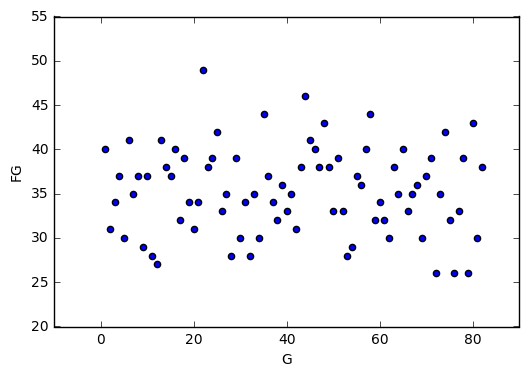

In [12]:
t.plot(x="G",y='FG',kind='Scatter')

# Here I charted using just the dataframe
## 'G' = How many games they played so I used it for the x axis
## 'FG' = How many shots they made, so I used it for Y axis as a test to make sure it worked
## scatter plot cause... well its a test :)


### wpct = (len(wrebounds_w)) / (len(trebounds_w))
### wwpct = (len(wassist_w)) / (len(assist_w))
### wwwpct = len(astrebw)/len(astreb)
## these 3 global variables I had to compute, so it is a bit trickier to plot these as they are NOT in the data frame but rather a global variable

# Hence my problem, I can store these variables in the instance, and make it its instance variable specific to that instance, but that I can't plot it lol

## Hope I made sense

## Touched up This morning, Also I created and got a free trial at datacamp.com

